# Deep Learning

## MiniProject 1 

### Mohamed Salah Zaiem - Master MVA


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.optimizers import SGD
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation, UpSampling2D
from keras.utils import to_categorical

Using TensorFlow backend.


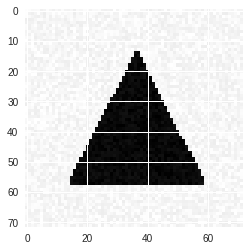

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_simple_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, False)
    Y_test = to_categorical(Y_test, 3) 
    return [X_test, Y_test]
  
  
  
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




## First Simple Classification

In [37]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
categorical_y  = to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [38]:
#Just a dense  with Adam Optimizer

seq_model = Sequential()
seq_model.add(Dense(3, input_shape=(5184,) ,activation="linear"))
seq_model.compile(optimizer='Adam',
              loss ="mean_squared_error", 
              metrics=['accuracy'])
first_model = seq_model.fit(X_train, categorical_y, batch_size=32, epochs=22)

Epoch 1/22
300/300 [==============================] - 1s 2ms/step - loss: 1.8991 - acc: 0.3467
Epoch 2/22
300/300 [==============================] - 0s 153us/step - loss: 0.5989 - acc: 0.4267
Epoch 3/22
300/300 [==============================] - 0s 148us/step - loss: 0.2644 - acc: 0.5933
Epoch 4/22
300/300 [==============================] - 0s 150us/step - loss: 0.1376 - acc: 0.7900
Epoch 5/22
300/300 [==============================] - 0s 155us/step - loss: 0.0920 - acc: 0.9100
Epoch 6/22
300/300 [==============================] - 0s 149us/step - loss: 0.0764 - acc: 0.9467
Epoch 7/22
300/300 [==============================] - 0s 147us/step - loss: 0.0730 - acc: 0.9233
Epoch 8/22
300/300 [==============================] - 0s 150us/step - loss: 0.0625 - acc: 0.9400
Epoch 9/22
300/300 [==============================] - 0s 151us/step - loss: 0.0608 - acc: 0.9567
Epoch 10/22
300/300 [==============================] - 0s 149us/step - loss: 0.0507 - acc: 0.9767
Epoch 11/22
300/300 [==========

Text(0,0.5,'loss')

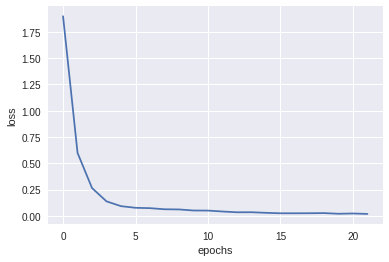

In [39]:
plt.plot(first_model.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")


In [42]:
X_test_1, Y_test_1 = generate_simple_test_set_classification()
seq_model.evaluate(X_test_1, Y_test_1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 91us/step


[0.028430592566728592, 0.9666666674613953]

In [0]:
# Testing accuracy 0.97

In [0]:
# Print the weights

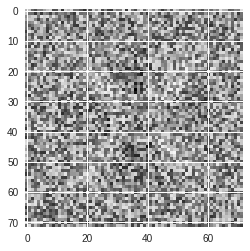

In [8]:
weights  = model.get_weights()[0]
first_column   = weights[:,0]
image_first = np.reshape(first_column, (72,72))
plt.imshow(image_first)


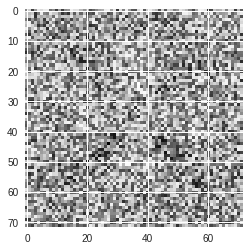

In [9]:
second_column   = weights[:,1]
image_second = np.reshape(second_column, (72,72))
plt.imshow(image_second)

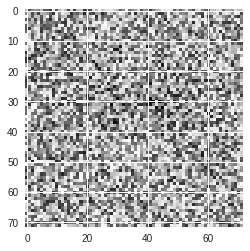

In [10]:
third_column   = weights[:,2]
image_third = np.reshape(third_column, (72,72))
plt.imshow(image_third)

### Stochastic Gradient Descent

In [11]:
model2 = Sequential()
sgd = SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)

model2.add(Dense(3, input_shape=(5184,) ,activation="linear"))
model2.compile(optimizer=sgd,
              loss ="mean_squared_error", 
              metrics=['accuracy'])
model2.fit(X_train, categorical_y, batch_size=32, epochs=22)

Epoch 1/22
300/300 [==============================] - 0s 464us/step - loss: 0.4358 - acc: 0.4200
Epoch 2/22
300/300 [==============================] - 0s 141us/step - loss: 0.1991 - acc: 0.6067
Epoch 3/22
300/300 [==============================] - 0s 144us/step - loss: 0.1548 - acc: 0.6600
Epoch 4/22
300/300 [==============================] - 0s 140us/step - loss: 0.1336 - acc: 0.7467
Epoch 5/22
300/300 [==============================] - 0s 138us/step - loss: 0.1083 - acc: 0.8233
Epoch 6/22
300/300 [==============================] - 0s 151us/step - loss: 0.0954 - acc: 0.8467
Epoch 7/22
300/300 [==============================] - 0s 142us/step - loss: 0.0833 - acc: 0.9033
Epoch 8/22
300/300 [==============================] - 0s 138us/step - loss: 0.0776 - acc: 0.8833
Epoch 9/22
300/300 [==============================] - 0s 135us/step - loss: 0.0694 - acc: 0.9300
Epoch 10/22
300/300 [==============================] - 0s 139us/step - loss: 0.0623 - acc: 0.9500
Epoch 11/22
300/300 [========

In [12]:
model2.evaluate(X_test_1, Y_test_1)

300/300 [==============================] - 0s 168us/step


[0.04145436137914658, 0.9633333333333334]

In [0]:
# With sgd, the accuracy is a little bit lower. ( 4 examples are misclassified)
# Adam is slower though

## A more complex problem : moving shapes

In [13]:
[X_train2, Y_train2] = generate_dataset_classification(1000, 20, True)
categorical_y2  = to_categorical(Y_train2, 3)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [0]:
# Deflatten the vector for convolutional networks

X_train_conv = np.reshape(X_train2, (X_train2.shape[0],72,72))

In [15]:
model_convolutional = Sequential()
model_convolutional.add(Conv1D(16, kernel_size=5, activation="linear", input_shape=(72,72)))
model_convolutional.add(MaxPooling1D(pool_size=8))
model_convolutional.add(Flatten())

model_convolutional.add(Dense(3 ,activation="softmax"))

model_convolutional.compile(optimizer='Adam',
              loss ="mean_squared_error", 
              metrics=['accuracy'])
model_convolutional.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 68, 16)            5776      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 6,163
Trainable params: 6,163
Non-trainable params: 0
_________________________________________________________________


In [16]:
convolutional_evolution = model_convolutional.fit(X_train_conv, categorical_y2, batch_size=16, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2485 - acc: 0.3690
Epoch 2/100
1000/1000 [==============================] - 0s 329us/step - loss: 0.2034 - acc: 0.4510
Epoch 3/100
1000/1000 [==============================] - 0s 327us/step - loss: 0.1835 - acc: 0.5520
Epoch 4/100
1000/1000 [==============================] - 0s 334us/step - loss: 0.1595 - acc: 0.6680
Epoch 5/100
1000/1000 [==============================] - 0s 315us/step - loss: 0.1510 - acc: 0.6630
Epoch 6/100
1000/1000 [==============================] - 0s 339us/step - loss: 0.1407 - acc: 0.7080
Epoch 7/100
1000/1000 [==============================] - 0s 335us/step - loss: 0.1346 - acc: 0.7300
Epoch 8/100
1000/1000 [==============================] - 0s 345us/step - loss: 0.1356 - acc: 0.7050
Epoch 9/100
1000/1000 [==============================] - 0s 342us/step - loss: 0.1242 - acc: 0.7650
Epoch 10/100
1000/1000 [==============================] - 0s 335us/step - loss: 0.1128 - acc: 0.7780
E

Text(0.5,1,'Moving shapes training with Convolutional network')

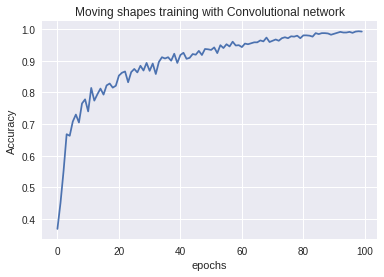

In [18]:
plt.plot(convolutional_evolution.history["acc"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Moving shapes training with Convolutional network")

In [19]:
X_test_2, Y_test_2 = generate_test_set_classification()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [20]:
model_convolutional.evaluate( np.reshape(X_test_2, (X_test_2.shape[0],72,72)), Y_test_2)

300/300 [==============================] - 0s 362us/step


[0.0840096045533816, 0.8333333333333334]

### Accuracy reaches 83%  with Adam Optimizer



In [21]:
sgd = SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)
model_convolutional = Sequential()
model_convolutional.add(Conv1D(16, kernel_size=5, activation="linear", input_shape=(72,72)))
model_convolutional.add(MaxPooling1D(pool_size=8))
model_convolutional.add(Flatten())

model_convolutional.add(Dense(3 ,activation="softmax"))

model_convolutional.compile(optimizer='sgd',
              loss ="mean_squared_error", 
              metrics=['accuracy'])
model_convolutional.summary()
model_convolutional.fit(X_train_conv, categorical_y2, batch_size=32, epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 68, 16)            5776      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 6,163
Trainable params: 6,163
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1000/1000 [==============================] - 0s 381us/step - loss: 0.2449 - acc: 0.2820
Epoch 2/100
1000/1000 [==============================] - 0s 152us/step - loss: 0.2356 - acc: 0.3220
Epoch 3/100
1000/1000 [==============================] - 0s 148us/step -

In [22]:
model_convolutional.evaluate( np.reshape(X_test_2, (X_test_2.shape[0],72,72)), Y_test_2)


300/300 [==============================] - 0s 290us/step


[0.1116662617524465, 0.7833333333333333]

**75**% Accuracy with SGD Optimizer

## A Regression Problem

In [23]:
# Generate the datasets
[X_train_reg, Y_train_reg] = generate_dataset_regression(5000, 20)
[X_test_reg, Y_test_reg] = generate_test_set_regression()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

## Idea : sorting the vertices 

Reasons : 1) this would make the generation of these vertices closer to the natural algorithm to do it. 

2) Without this step, the mapping between an image and the vertices is not an application, as a single image leads to six possible results.




In [0]:
#We do the sorting according to the first coordinate 


for i in range(Y_train_reg.shape[0]) : 
  X_coordinates = Y_train_reg[i][[0,2,4]]
  sorted_x = sorted(range(len(X_coordinates)), key=lambda k: X_coordinates[k])
  new_coordinates = []
  for j in sorted_x : 
    new_coordinates.append(Y_train_reg[i][2*j])
    new_coordinates.append(Y_train_reg[i][2*j+1])
  Y_train_reg[i] = new_coordinates
  
  

In [0]:
#Normalization  

from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
y_train_normalize = normalizer.fit_transform(Y_train_reg)
y_test_normalize = normalizer.transform(Y_test_reg)

# The good thing with StandardScaler is that it allows us to detransform the scaled outputs afterwards. 

In [0]:
X_reg_conv = np.reshape(X_train_reg, (X_train_reg.shape[0],72,72,1))

In [0]:
drop_rate = 0.3
model_reg =Sequential()

model_reg.add(Conv2D(40, kernel_size=(5,5),input_shape=(72,72,1,),activation='relu'))
model_reg.add(Dropout(drop_rate))
model_reg.add(MaxPooling2D(2,2))
model_reg.add(Conv2D(20,kernel_size=(4,4),activation='relu'))
model_reg.add(Flatten())
model_reg.add(Dropout(drop_rate))
model_reg.add(Dense(6))
model_reg.compile(loss='mean_squared_error',
              optimizer='adam')


In [29]:
evolution =  model_reg.fit(X_reg_conv,y_train_normalize,validation_split=0.1,epochs=100, batch_size=32)

Train on 4500 samples, validate on 500 samples
Epoch 1/100
4500/4500 [==============================] - 3s 740us/step - loss: 0.4728 - val_loss: 0.3016
Epoch 2/100
4500/4500 [==============================] - 3s 607us/step - loss: 0.2409 - val_loss: 0.2167
Epoch 3/100
4500/4500 [==============================] - 3s 605us/step - loss: 0.1804 - val_loss: 0.2032
Epoch 4/100
4500/4500 [==============================] - 3s 602us/step - loss: 0.1555 - val_loss: 0.1918
Epoch 5/100
4500/4500 [==============================] - 3s 605us/step - loss: 0.1414 - val_loss: 0.1697
Epoch 6/100
4500/4500 [==============================] - 3s 608us/step - loss: 0.1271 - val_loss: 0.1707
Epoch 7/100
4500/4500 [==============================] - 3s 602us/step - loss: 0.1191 - val_loss: 0.1584
Epoch 8/100
4500/4500 [==============================] - 3s 610us/step - loss: 0.1169 - val_loss: 0.1788
Epoch 9/100
4500/4500 [==============================] - 3s 609us/step - loss: 0.0998 - val_loss: 0.1799
Epoch 10

Text(0.5,1,'loss evolution')

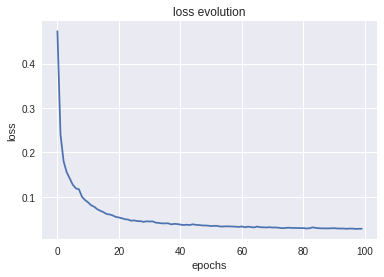

In [30]:
plt.plot(evolution.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss evolution")

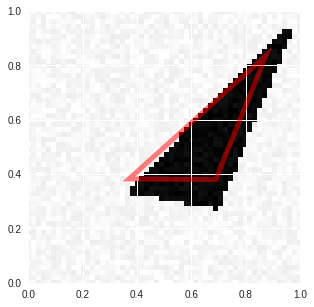

In [32]:
X_reg_conv_test = np.reshape(X_test_reg, (X_test_reg.shape[0],72,72,1))
predictions_test = model_reg.predict(X_reg_conv_test)

#Use the scaler to get to the original vertices
Y_predictions = normalizer.inverse_transform(predictions_test)
visualize_prediction(X_test_reg[0], Y_predictions[0])


The results are far from being perfect, but the predicted triangle is not far from the original one.  \\

Sine the same is particularly well got, I think the denormalization may be the problem

## Denoising

### New Generation Functions

In [0]:
def generate_a_drawing_denoising(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise,imdata

def generate_a_rectangle_denoising(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_denoising(figsize, U, V, noise)


def generate_a_disk_denoising(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_denoising(figsize, U, V, noise)

def generate_a_triangle_denoising(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3).reshape((1,-1))
        V = np.random.random(3).reshape((1,-1))
        
        ##sort vertices by increasing x in order to improve the regression outcomes
        vertices = np.concatenate((U,V),axis=0)
        vertices = vertices[:,vertices[0,:].argsort()]
        U = vertices[0]
        V = vertices[1]
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    noise, imdata = generate_a_drawing_denoising(figsize, U, V, noise)
    return [noise,imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]






def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()



def generate_dataset_noise(nb_samples, free_location=False):
    im_size = 5184
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        noise = np.random.randint(10,30)
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i],Y[i] = generate_a_rectangle_denoising(noise, free_location)
        elif category == 1: 
            X[i],Y[i] = generate_a_disk_denoising(noise, free_location)
        else:
            output = generate_a_triangle_denoising(noise, free_location)
            X[i],Y[i] = output[0], output[1]
    X = (X) / (255)
    Y = (Y)/(255)
    return [X, Y]


def generate_test_set_noise():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_noise(300, 20)
    return [X_test, Y_test]    

  


In [3]:
X_train_noise,Y_train_noise = generate_dataset_noise(15000) 
X_test_noise,Y_test_noise = generate_test_set_noise() 
# The generation takes some time

# Reshape for convolution
X_train_noise = X_train_noise.reshape((X_train_noise.shape[0],72,72,1))
Y_train_noise = Y_train_noise.reshape((Y_train_noise.shape[0],72,72,1))

X_test_noise = X_test_noise.reshape((X_test_noise.shape[0],72,72,1))
Y_test_noise = Y_test_noise.reshape((Y_test_noise.shape[0],72,72,1))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

## HourGlass Network

In [4]:
#Hour Glass : 

#Architecture inspired by this Segnet Implementation
#https://github.com/imlab-uiip/keras-segnet/blob/master/model_5l.json
model =Sequential()

model.add(Conv2D(60,kernel_size=(3,3),input_shape=(72,72,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(40,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(60,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(40,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(60,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(20,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(40,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(20,kernel_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1)))
model.add(Conv2D(1,kernel_size=(3,3)))

model.compile(loss='mse',
              optimizer='adam')
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 72, 72, 60)        600       
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 60)        240       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 40)        9640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 40)        160       
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 40)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 40)        0         
__________

In [5]:
history= model.fit(X_train_noise,Y_train_noise,validation_split=0.05,epochs=100,batch_size=128)


Train on 14250 samples, validate on 750 samples
Epoch 1/100
14250/14250 [==============================] - 32s 2ms/step - loss: 0.0612 - val_loss: 0.0184
Epoch 2/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0072 - val_loss: 0.0107
Epoch 3/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0053 - val_loss: 0.0075
Epoch 4/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0046 - val_loss: 0.0068
Epoch 5/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 6/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 8/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 9/100
14250/14250 [==============================] - 28s 2ms/step - loss: 0.0024 - val_loss: 0.002

Text(0,0.5,'loss')

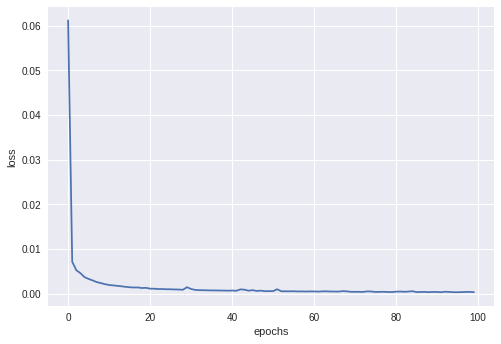

In [21]:
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Evolution Hourglass Network")

The denoising does not work really well, the output images are really noisy.
However, they are quite well situated, and the shape is respected
We give a few examples here

Text(0.5,1,'Real Y test')

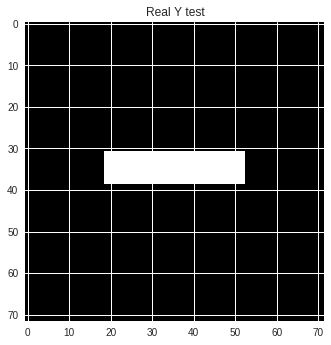

In [22]:
Y_pred_without_noise = model.predict(X_test_noise)

#print some results
plt.imshow(Y_test_noise[0].reshape(72,72))
plt.title('Real Y test')



Text(0.5,1,'Denoised image')

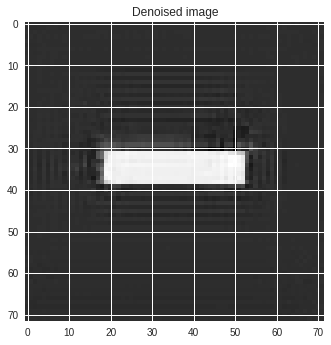

In [23]:
plt.imshow(Y_pred_without_noise[0].reshape(72,72))
plt.title('Denoised image')


Text(0.5,1,'Real Y test')

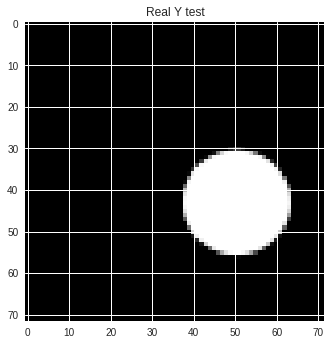

In [28]:

plt.imshow(Y_test_noise[4].reshape(72,72))
plt.title('Real Y test')


Text(0.5,1,'Denoised image')

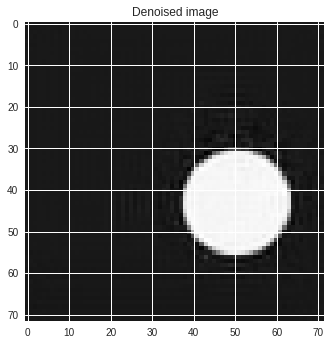

In [29]:
plt.imshow(Y_pred_without_noise[4].reshape(72,72))
plt.title('Denoised image')


Text(0.5,1,'Real Y test')

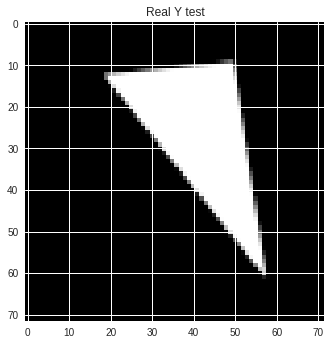

In [31]:
plt.imshow(Y_test_noise[6].reshape(72,72))
plt.title('Real Y test')


Text(0.5,1,'Denoised image')

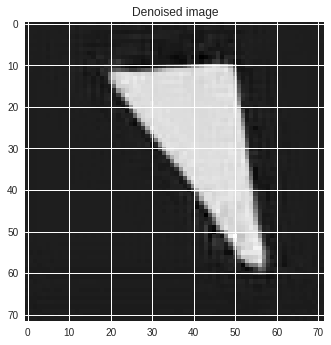

In [32]:
plt.imshow(Y_pred_without_noise[6].reshape(72,72))
plt.title('Denoised image')
